In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import json

In [4]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


In [6]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [8]:
data_classes = training_set.class_names
data_classes

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

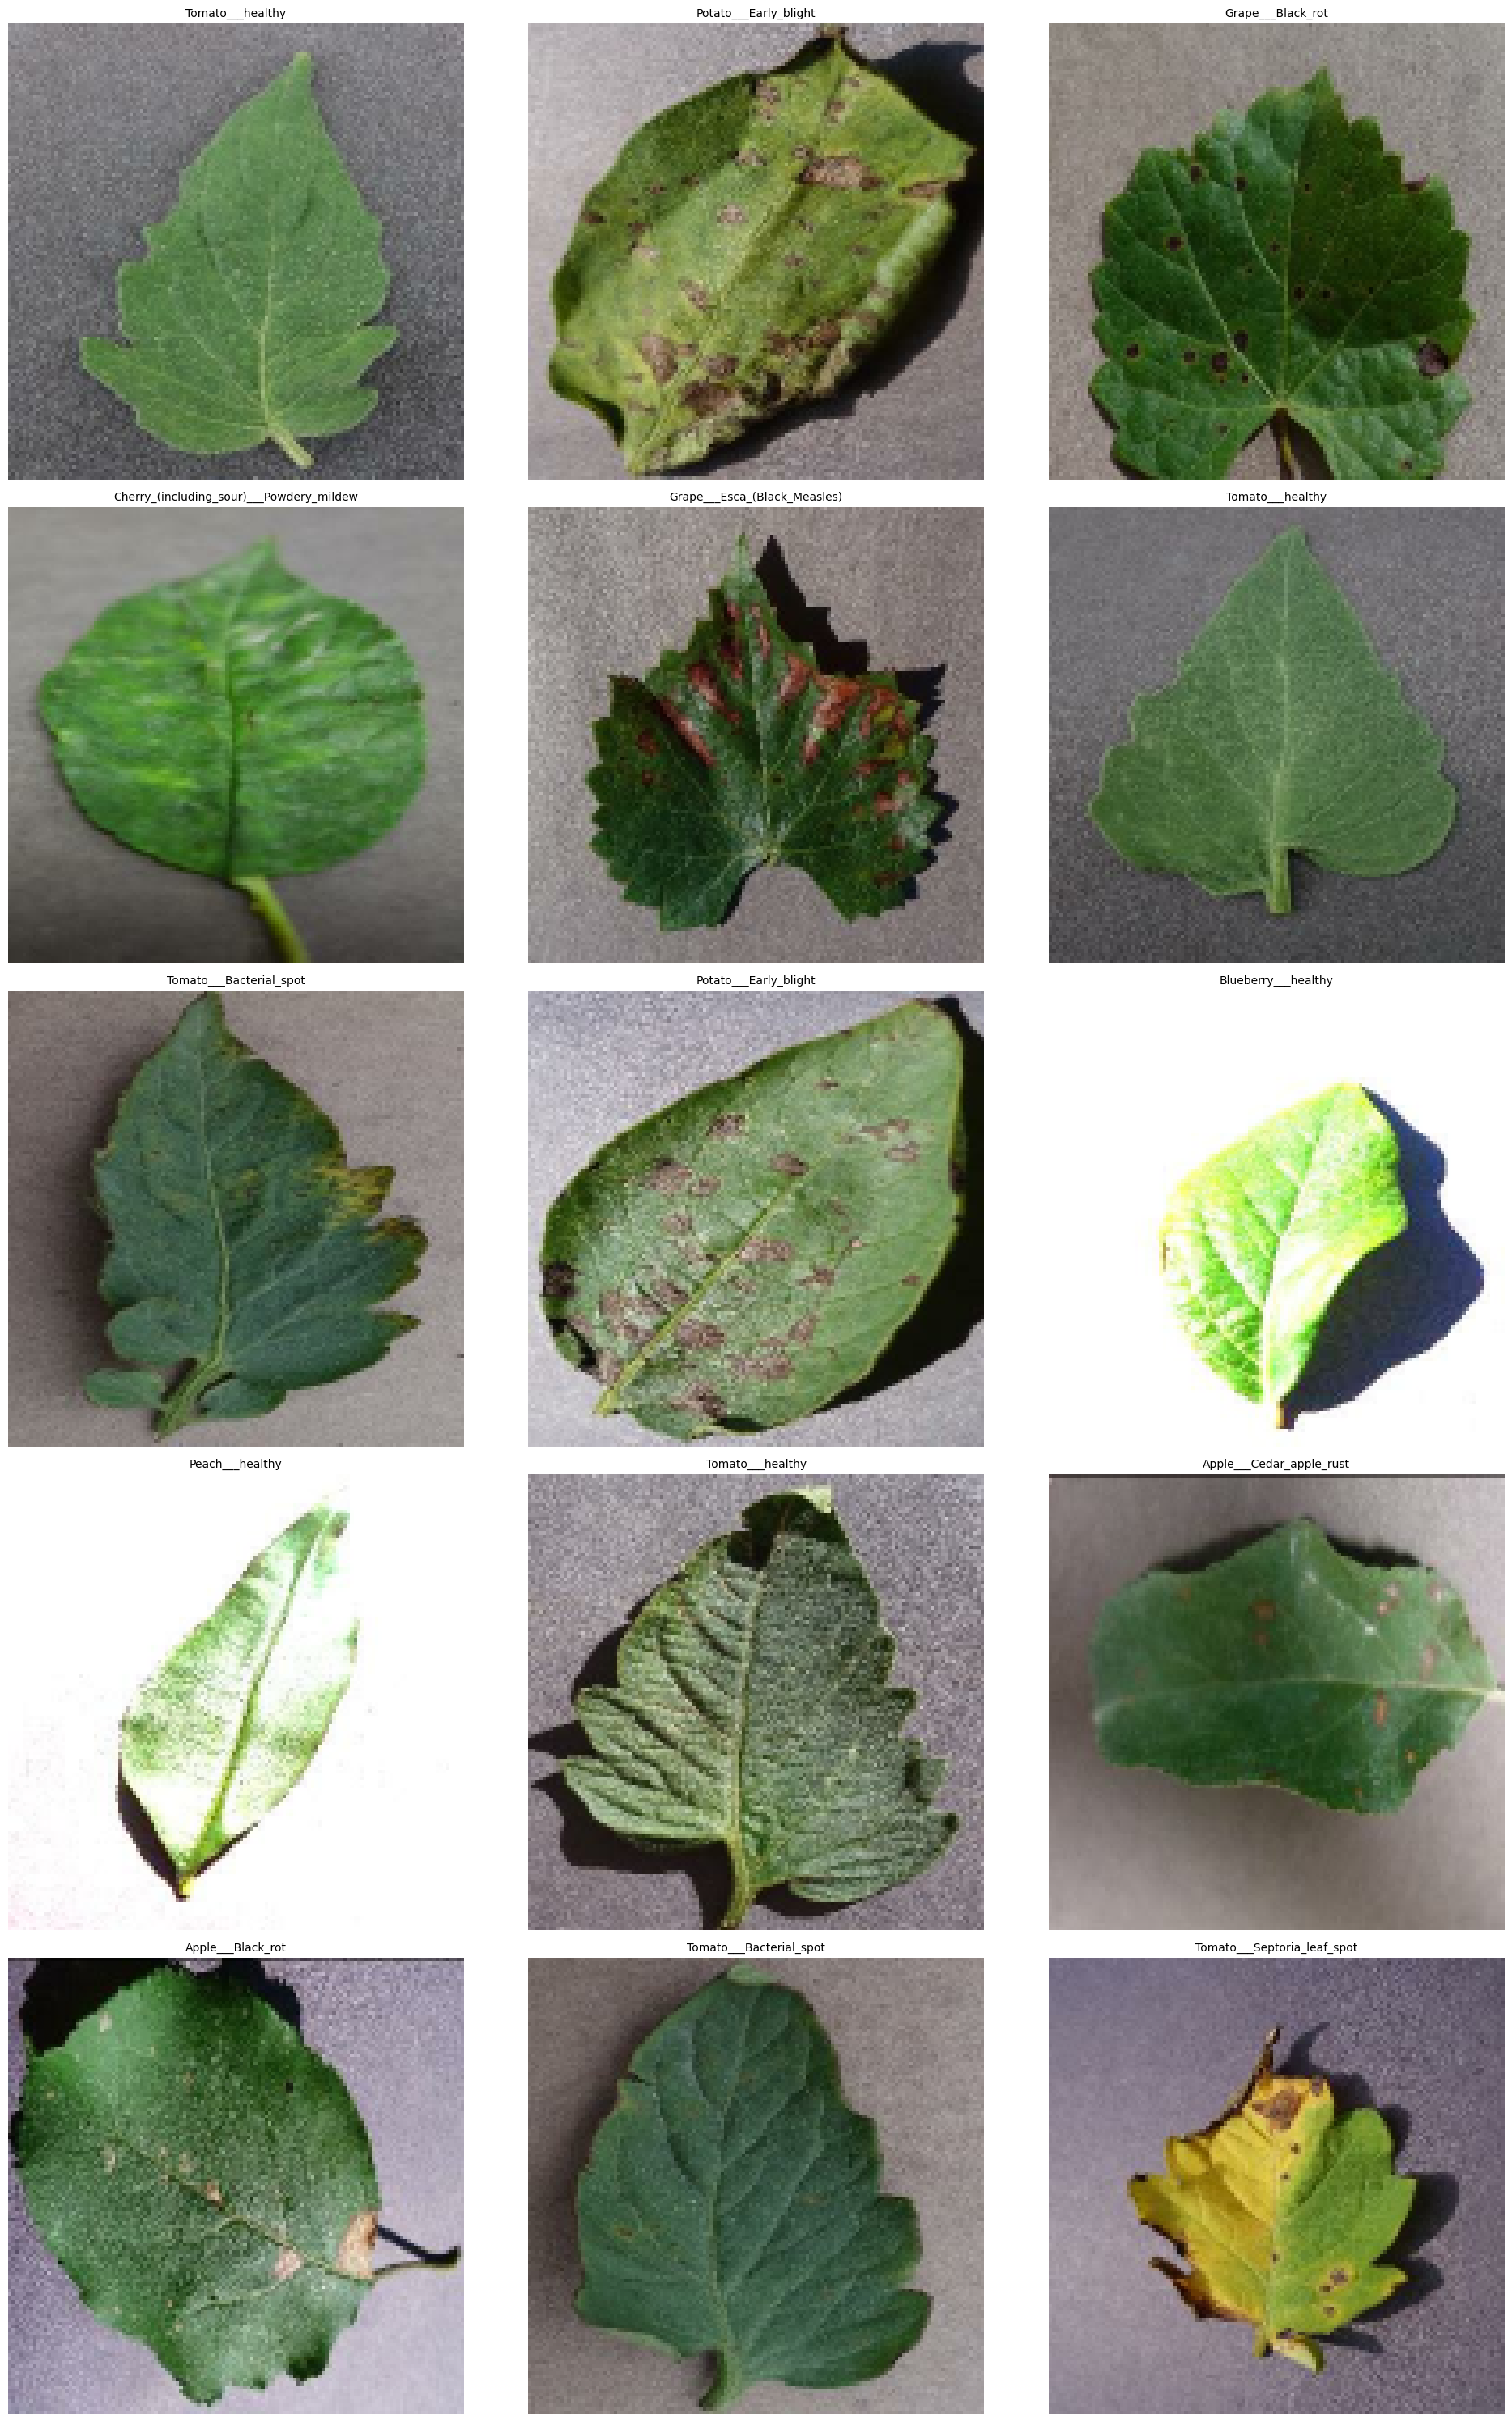

<Figure size 640x480 with 0 Axes>

In [10]:
plt.figure(figsize=(20, 30))
for images, labels in training_set.take(1):
    for i in range(15):
        plt.subplot(5, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        
        # Get the index of the true class
        true_class_index = tf.argmax(labels[i]).numpy()
        class_name = data_classes[true_class_index]
        
        plt.title(class_name, fontsize=10)
        plt.axis('off')

plt.tight_layout()
plt.show()
plt.savefig("imgoverview.jpg")

In [ ]:
# plt.figure(figsize=(10, 10))
# for image,label in training_set.take(1):
#     for i in range(9):
#         plt.subplot(3,3,i+1)
#         plt.imshow(image[i].numpy().astype('uint8'))
#         plt.title(data_classes[tf.argmax(label[i]).numpy()])
#         plt.axis('off')

In [12]:
for x,y in training_set:
    print(x, x.shape)
    print(y, y.shape)
    break

tf.Tensor(
[[[[159.75 153.75 155.75]
   [157.   151.   153.  ]
   [157.   151.   153.  ]
   ...
   [151.5  145.5  149.5 ]
   [149.75 143.75 147.75]
   [155.75 149.75 153.75]]

  [[161.   155.   157.  ]
   [159.25 153.25 155.25]
   [152.75 146.75 148.75]
   ...
   [155.   149.   153.  ]
   [159.   153.   157.  ]
   [155.   149.   153.  ]]

  [[158.5  152.5  154.5 ]
   [151.25 145.25 147.25]
   [152.75 146.75 148.75]
   ...
   [159.75 153.75 157.75]
   [157.75 151.75 155.75]
   [145.75 139.75 143.75]]

  ...

  [[116.25 107.25 110.25]
   [121.75 112.75 115.75]
   [117.   108.   111.  ]
   ...
   [110.5  101.5  104.5 ]
   [110.75 101.75 104.75]
   [ 99.    90.    93.  ]]

  [[115.75 106.75 109.75]
   [111.5  102.5  105.5 ]
   [110.25 101.25 104.25]
   ...
   [112.75 103.75 106.75]
   [106.    97.   100.  ]
   [107.5   98.5  101.5 ]]

  [[116.   107.   110.  ]
   [119.   110.   113.  ]
   [115.25 106.25 109.25]
   ...
   [102.75  93.75  96.75]
   [112.25 103.25 106.25]
   [ 99.    90.    9

In [14]:
# from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense, GlobalAveragePooling2D, Rescaling
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [ ]:
# model = Sequential([
#     layers.Rescaling(1./255),
#     layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'),
#     layers.MaxPooling2D(),
#     layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
#     layers.MaxPooling2D(),
#     layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
#     layers.MaxPooling2D(),
#     layers.Flatten(),
#     layers.Dropout(0.2),
#     layers.Dense(128),
#     layers.Dense(units=27, activation='softmax')
# ])

In [20]:
model = Sequential([
    
    Rescaling(1./255, input_shape=[128, 128, 3]),
    # Conv2D(filters=16, kernel_size=3, padding='same', activation='relu', kernel_regularizer=l2(0.0001)),BatchNormalization()),
    # Conv2D(filters=16, kernel_size=3, activation='relu', kernel_regularizer=l2(0.0001)), BatchNormalization()),
    # MaxPool2D(pool_size=2, strides=2, kernel_regularizer=l2(0.0001)), BatchNormalization()),
    
    # Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', kernel_regularizer=l2(0.0001)), BatchNormalization()),
    # Conv2D(filters=32, kernel_size=3, activation='relu', kernel_regularizer=l2(0.0001)), BatchNormalization()),
    # MaxPool2D(pool_size=2, strides=2),

    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(filters=32, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2),
    
    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(filters=64, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2),
    
    Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(filters=128, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2),

    Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(filters=256, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2),
    
    Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(filters=512, kernel_size=3, activation='relu'),
    BatchNormalization(),
    GlobalAveragePooling2D(),
    
    # Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(units=38, activation='softmax')
])

In [46]:
model2 = Sequential([
    
    Rescaling(1./255, input_shape=[128, 128, 3]),
    # Conv2D(filters=16, kernel_size=3, padding='same', activation='relu', kernel_regularizer=l2(0.0001)),BatchNormalization()),
    # Conv2D(filters=16, kernel_size=3, activation='relu', kernel_regularizer=l2(0.0001)), BatchNormalization()),
    # MaxPool2D(pool_size=2, strides=2, kernel_regularizer=l2(0.0001)), BatchNormalization()),
    
    # Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', kernel_regularizer=l2(0.0001)), BatchNormalization()),
    # Conv2D(filters=32, kernel_size=3, activation='relu', kernel_regularizer=l2(0.0001)), BatchNormalization()),
    # MaxPool2D(pool_size=2, strides=2),

    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(filters=32, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2),
    
    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(filters=64, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2),
    
    Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(filters=128, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2),

    Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(filters=256, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2),
    
    Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(filters=512, kernel_size=3, activation='relu'),
    BatchNormalization(),
    GlobalAveragePooling2D(),
    
    # Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(units=38, activation='softmax')
])

C:\Users\Excellus\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [48]:
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 63, 63, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 30, 30, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 14, 14, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │              

 Total params: 5,002,310 (19.08 MB)

 Trainable params: 4,998,342 (19.07 MB)

 Non-trainable params: 3,968 (15.50 KB)

In [50]:
model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)              │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 63, 63, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 30, 30, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_24               │ (None, 14, 14, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │              

 Total params: 5,002,310 (19.08 MB)

 Trainable params: 4,998,342 (19.07 MB)

 Non-trainable params: 3,968 (15.50 KB)

In [23]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [26]:
# Fit the model
history = model.fit(
    training_set,
    validation_data= validation_set,
    epochs=10,
    # callbacks=[reduce_lr, early_stop]
)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 5319s 2s/step - accuracy: 0.6132 - loss: 1.3638 - val_accuracy: 0.9175 - val_loss: 0.2586
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 5325s 2s/step - accuracy: 0.9058 - loss: 0.2979 - val_accuracy: 0.9267 - val_loss: 0.2302
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 8110s 4s/step - accuracy: 0.9454 - loss: 0.1741 - val_accuracy: 0.9487 - val_loss: 0.1680
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 5349s 2s/step - accuracy: 0.9647 - loss: 0.1119 - val_accuracy: 0.9637 - val_loss: 0.1130
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 5464s 2s/step - accuracy: 0.9712 - loss: 0.0851 - val_accuracy: 0.9717 - val_loss: 0.0884
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 29091s 13s/step - accuracy: 0.9776 - loss: 0.0703 - val_accuracy: 0.9557 - val_loss: 0.1359
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 5163s 2s/step - accuracy: 0.9797 - loss: 0.0609 - val_accuracy: 0.9718 - val_loss: 0.0968
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 16667s 8s/step - accuracy: 0.984

In [52]:
# Fit the model
history2 = model2.fit(
    training_set,
    validation_data= validation_set,
    epochs=5,
    # callbacks=[reduce_lr, early_stop]
)

Epoch 1/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 5709s 3s/step - accuracy: 0.6272 - loss: 1.3188 - val_accuracy: 0.9031 - val_loss: 0.3076
Epoch 2/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 5659s 3s/step - accuracy: 0.9122 - loss: 0.2852 - val_accuracy: 0.9441 - val_loss: 0.1734
Epoch 3/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 5660s 3s/step - accuracy: 0.9445 - loss: 0.1716 - val_accuracy: 0.9464 - val_loss: 0.1597
Epoch 4/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 5684s 3s/step - accuracy: 0.9607 - loss: 0.1204 - val_accuracy: 0.9051 - val_loss: 0.3083
Epoch 5/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 6025s 3s/step - accuracy: 0.9710 - loss: 0.0895 - val_accuracy: 0.9767 - val_loss: 0.0736


In [28]:
history.history

{'accuracy': [0.7588590979576111,
  0.9195675253868103,
  0.9510633945465088,
  0.9656163454055786,
  0.9721459746360779,
  0.9786756038665771,
  0.9812362194061279,
  0.9848495721817017,
  0.9867416024208069,
  0.988377571105957],
 'loss': [0.8197036981582642,
  0.25385746359825134,
  0.154946431517601,
  0.10880915075540543,
  0.08442283421754837,
  0.06573518365621567,
  0.05735429376363754,
  0.048156484961509705,
  0.041733965277671814,
  0.0362105555832386],
 'val_accuracy': [0.9175392389297485,
  0.926701545715332,
  0.948668360710144,
  0.9637491703033447,
  0.9717163443565369,
  0.9557250142097473,
  0.9718301892280579,
  0.9824151992797852,
  0.9773503541946411,
  0.8860118389129639],
 'val_loss': [0.2585538923740387,
  0.23015381395816803,
  0.16804173588752747,
  0.11296689510345459,
  0.08840925246477127,
  0.1358869969844818,
  0.09675402194261551,
  0.054753053933382034,
  0.07074388861656189,
  0.4287835955619812]}

In [54]:
history2.history

{'accuracy': [0.7687744498252869,
  0.9223557710647583,
  0.9491997957229614,
  0.9636104702949524,
  0.9732698202133179],
 'loss': [0.7882338762283325,
  0.2479970008134842,
  0.15679685771465302,
  0.11168819665908813,
  0.08384572714567184],
 'val_accuracy': [0.9030844569206238,
  0.9441156387329102,
  0.9463919997215271,
  0.9051331877708435,
  0.9766674041748047],
 'val_loss': [0.3076118230819702,
  0.17342497408390045,
  0.15969400107860565,
  0.308318167924881,
  0.07364512979984283]}

In [58]:
model.save('trainedv3.h5')

In [60]:
model2.save('newplantdis.keras')

In [62]:
model2.save('newplantdis.h5')

In [30]:
train_loss, train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1058s 482ms/step - accuracy: 0.9010 - loss: 0.3361


In [64]:
train_loss2, train_acc2 = model2.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1214s 552ms/step - accuracy: 0.9879 - loss: 0.0385


In [32]:
print(train_loss, train_acc)

0.32564494013786316 0.9042037129402161


In [66]:
print(train_loss2, train_acc2)

0.03389570116996765 0.9894160032272339


In [34]:
val_loss, val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 263s 477ms/step - accuracy: 0.8891 - loss: 0.4252


In [68]:
val_loss2, val_acc2 = model2.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 295s 537ms/step - accuracy: 0.9776 - loss: 0.0739


In [36]:
print(val_loss, val_acc)

0.42878368496894836 0.8860118389129639


In [70]:
print(val_loss2, val_acc2)

0.07364512979984283 0.9766674041748047


In [72]:
with open ('training_histv3.json', 'w') as f:
    json.dump(history.history,f)

In [74]:
with open ('training_hist2v3.json', 'w') as f:
    json.dump(history2.history,f)

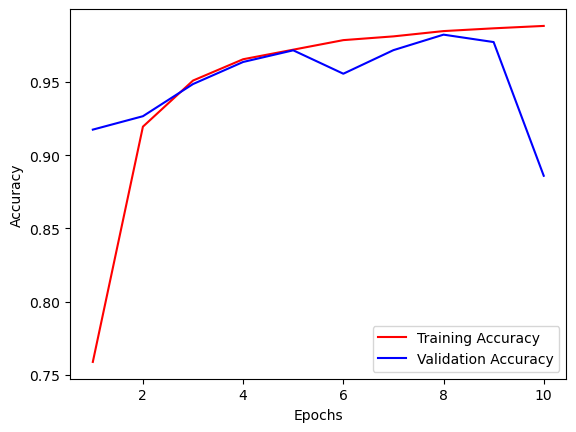

In [40]:
epochs = [i for i in range(1,11)]
plt.plot(epochs, history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("output.jpg")
# Saving figure by changing parameter values
plt.savefig("output1", facecolor='y', bbox_inches="tight",
            pad_inches=0.3, transparent=True)
plt.show()

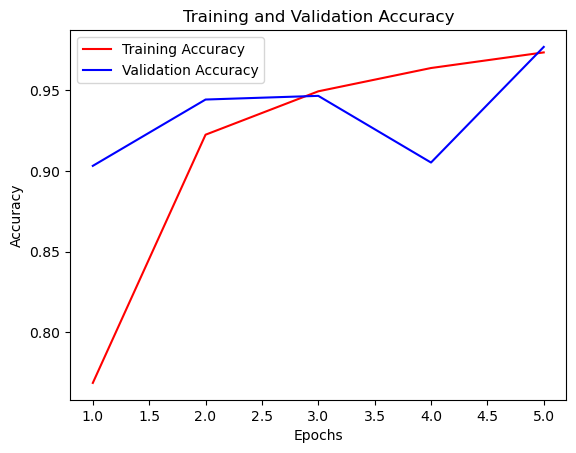

In [76]:
epochs = [i for i in range(1,6)]
plt.plot(epochs, history2.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, history2.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.savefig("output2.jpg")
# Saving figure by changing parameter values
plt.savefig("output12", facecolor='y', bbox_inches="tight",
            pad_inches=0.3, transparent=True)
plt.show()

In [ ]:
len(history.history['accuracy'])

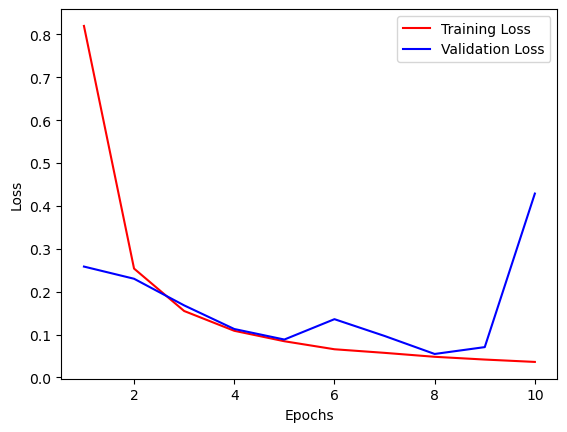

In [42]:
epochs = [i for i in range(1,11)]
plt.plot(epochs, history.history['loss'], color='red', label='Training Loss')
plt.plot(epochs, history.history['val_loss'], color='blue', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("outputloss.jpg")
plt.show()

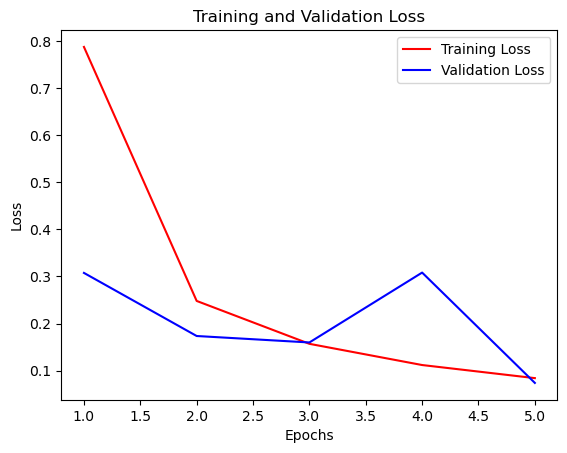

In [78]:
epochs = [i for i in range(1,6)]
plt.plot(epochs, history2.history['loss'], color='red', label='Training Loss')
plt.plot(epochs, history2.history['val_loss'], color='blue', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.savefig("outputloss2.jpg")
plt.show()

In [80]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [82]:
y_pred = model2.predict(test_set)
y_pred, y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 293s 531ms/step


(array([[1.0000000e+00, 4.0873960e-10, 2.5464934e-11, ..., 1.9188508e-14,
         4.5038838e-15, 7.2018482e-13],
        [9.9999690e-01, 3.0441095e-06, 3.6768393e-09, ..., 4.8382995e-12,
         3.0292626e-11, 4.1943971e-10],
        [1.0000000e+00, 9.6994211e-11, 6.0850639e-12, ..., 3.3797320e-15,
         3.9144154e-15, 6.4873064e-13],
        ...,
        [1.9971264e-11, 7.0302024e-12, 3.5209424e-09, ..., 1.3342716e-10,
         8.5092478e-10, 9.9999952e-01],
        [9.2644746e-11, 1.0432135e-10, 2.5335092e-08, ..., 2.2960035e-10,
         4.4995430e-10, 9.9999833e-01],
        [2.0563685e-10, 1.0926355e-10, 6.3567813e-09, ..., 6.0829751e-11,
         2.0520246e-09, 9.9999750e-01]], dtype=float32),
 (17572, 38))

In [84]:
pred_cat = tf.argmax(y_pred, axis=1)

In [88]:
pred_cat, pred_cat.shape

(<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>,
 TensorShape([17572]))

In [90]:
y_true = tf.concat([y for x,y in test_set], axis=0)
y_true

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [92]:
true_cat = tf.argmax(y_true, axis=1)

In [94]:
true_cat

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [138]:
from sklearn.metrics import classification_report,confusion_matrix

In [102]:
print(classification_report(true_cat, pred_cat, target_names=data_classes))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.98      0.98       504
                                 Apple___Black_rot       0.99      0.97      0.98       497
                          Apple___Cedar_apple_rust       0.99      0.98      0.99       440
                                   Apple___healthy       0.99      0.98      0.98       502
                               Blueberry___healthy       0.97      0.99      0.98       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.97      0.98       421
                 Cherry_(including_sour)___healthy       0.98      1.00      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.96      0.91      0.93       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.93      0.98      0.

In [132]:
from PIL import Image, ImageDraw, ImageFont

report = classification_report(true_cat, pred_cat, target_names=data_classes)

screen_width = 1920
screen_height = 1080
image = Image.new('RGB', (500, 700), color='white')
draw = ImageDraw.Draw(image)

font = ImageFont.load_default()

In [120]:
def draw_text(draw, text, position, font, max_width):
    lines = []
    words = text.split(' ')
    while words:
        line = ''
        while words and draw.textbbox((0, 0), line + words[0], font=font)[2] <= max_width:
            line += (words.pop(0) + ' ')
        lines.append(line)
    
    x, y = position
    for line in lines:
        draw.text((x, y), line, font=font, fill='black')
        y += draw.textbbox((0, 0), line, font=font)[3] - draw.textbbox((0, 0), line, font=font)[1]

# Calculate position to start text
x = 50
y = 50

In [134]:
draw_text(draw, report, (x, y), font, screen_width - 100)

# Save image
image.save("precision.png")

In [142]:
con_mat = confusion_matrix(true_cat, pred_cat)
con_mat

array([[495,   0,   0, ...,   0,   0,   0],
       [  2, 482,   0, ...,   0,   0,   0],
       [  0,   1, 433, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 479,   0,   0],
       [  1,   1,   0, ...,   0, 440,   0],
       [  0,   0,   0, ...,   0,   0, 471]], dtype=int64)

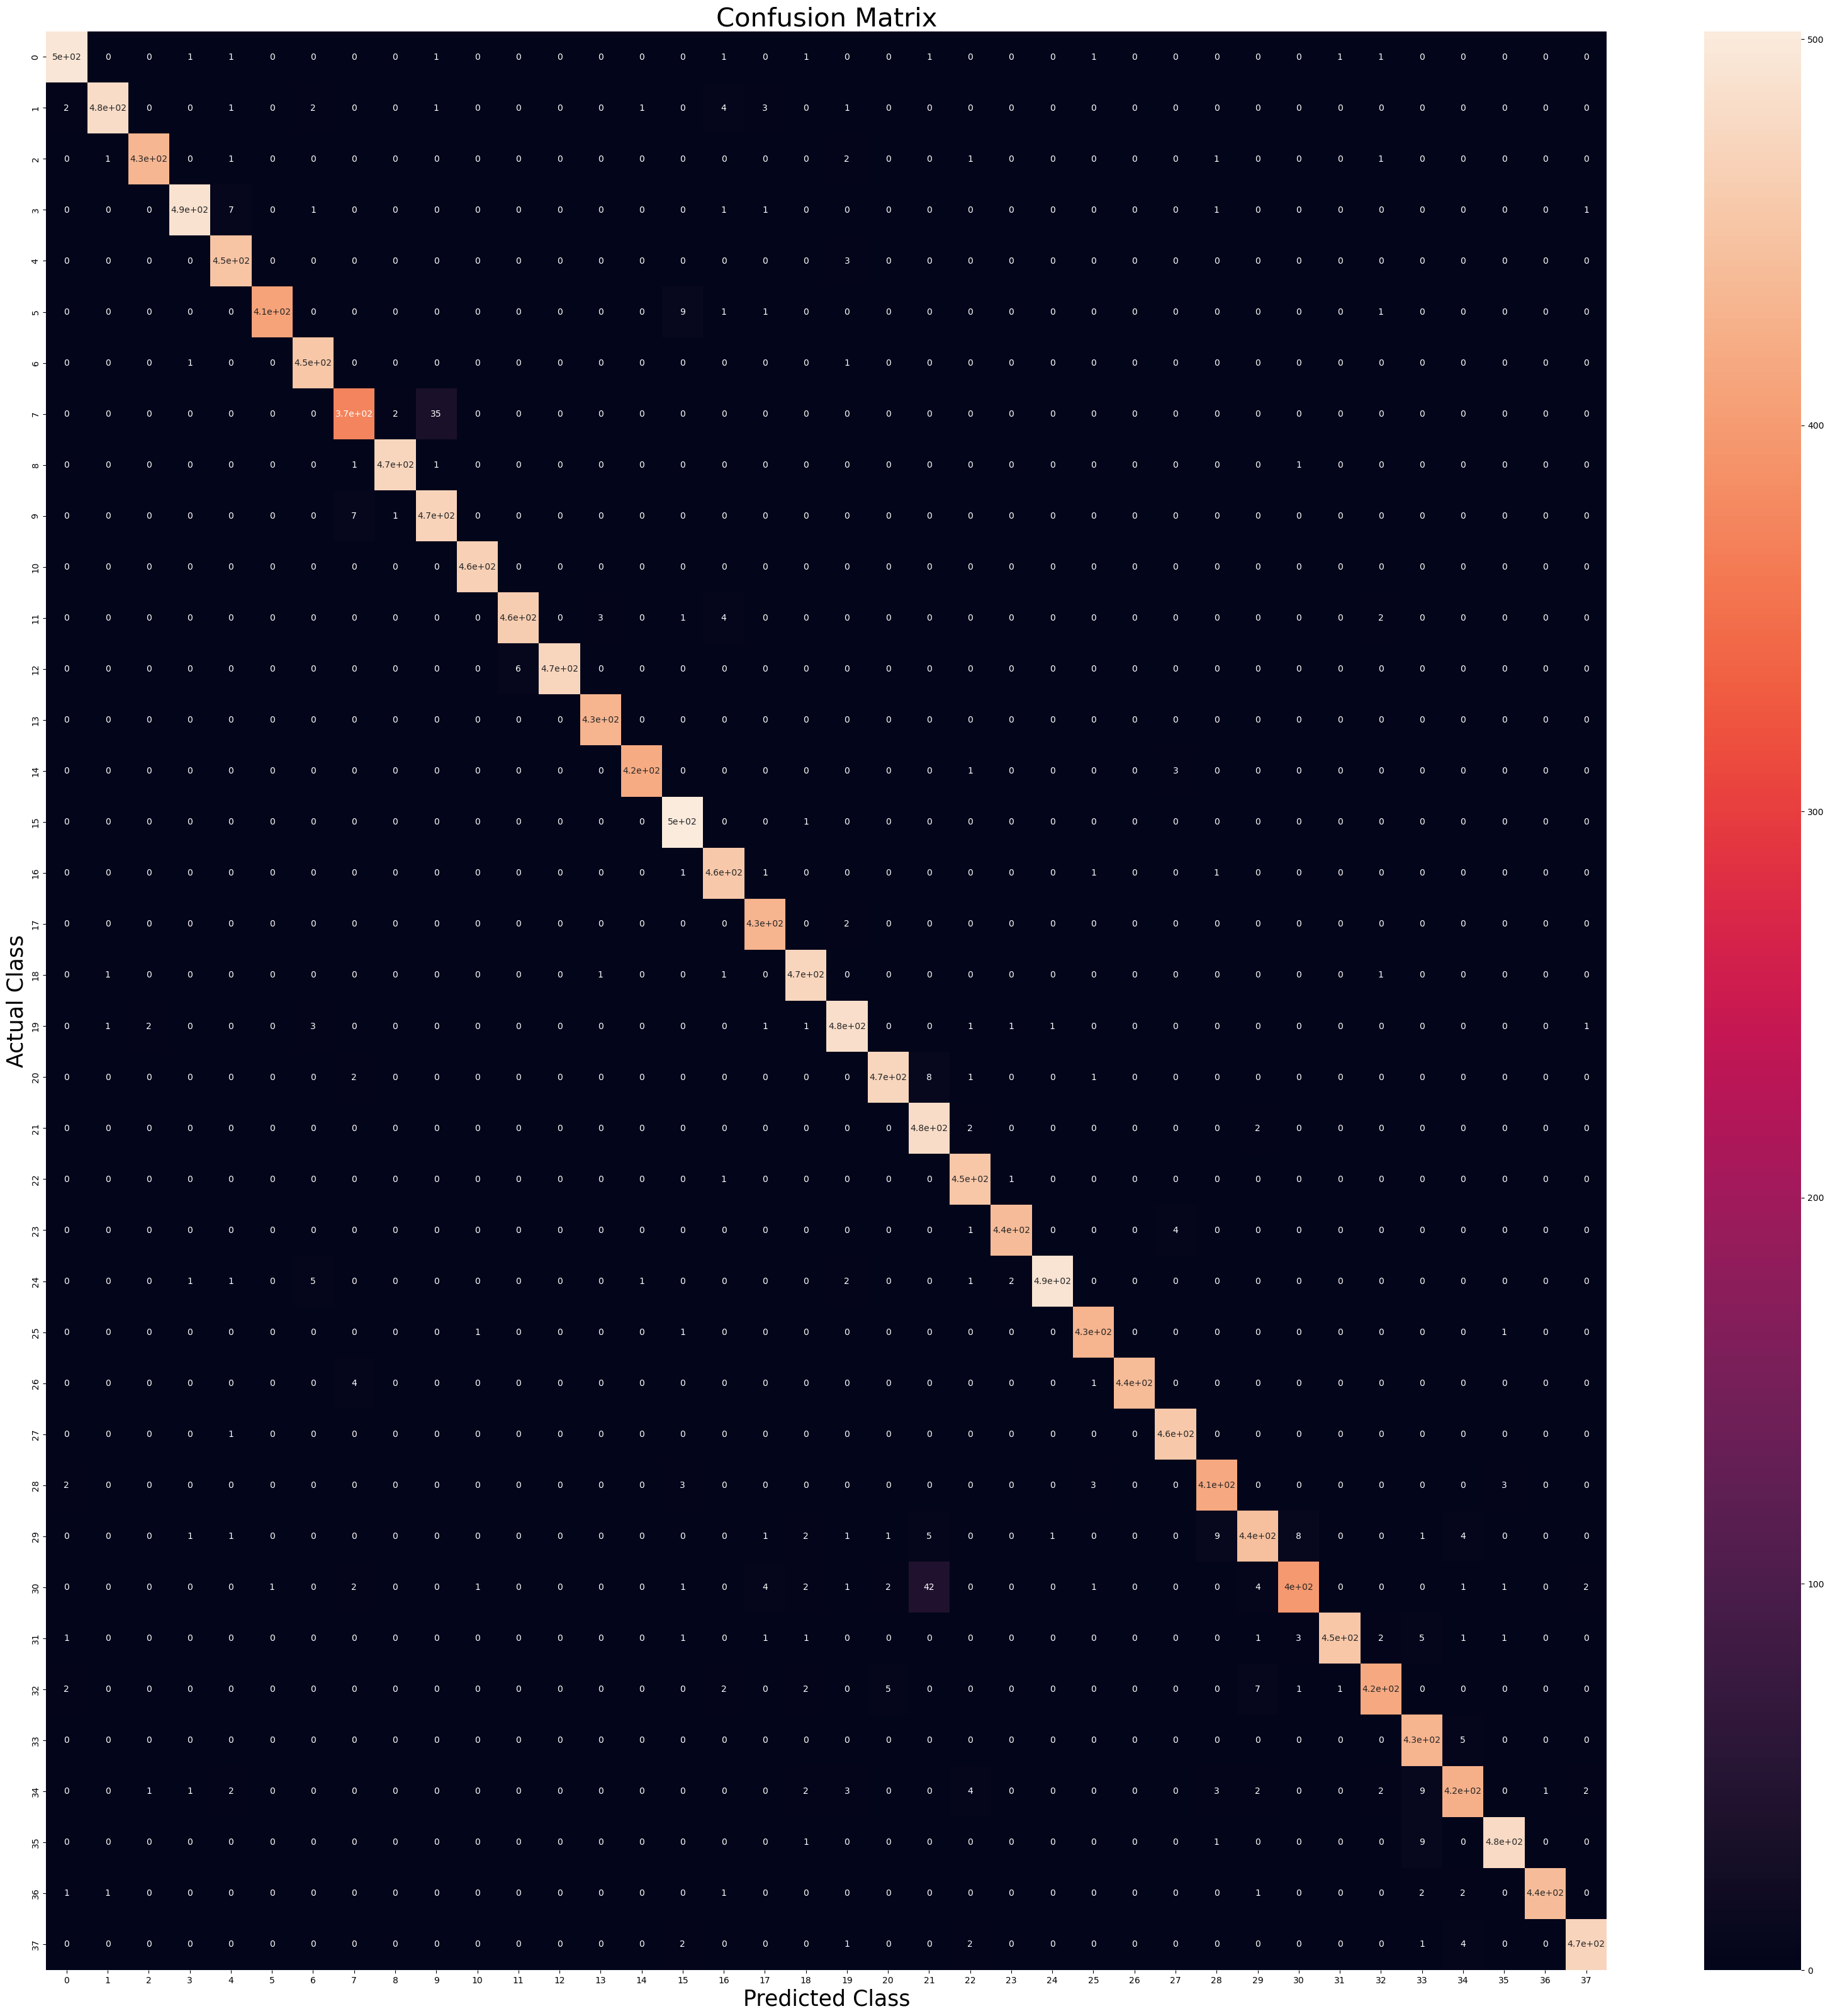

In [152]:
plt.figure(figsize =(40,40))
sns.heatmap(con_mat, annot=True, annot_kws={'size':10})
plt.xlabel('Predicted Class', fontsize=25)
plt.ylabel('Actual Class', fontsize=25)
plt.title('Confusion Matrix', fontsize=30)
plt.savefig("conf_mat.png")
plt.show()

In [160]:
Imodel = tf.keras.models.load_model('newplantdis.keras')

In [162]:
Imodel.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)              │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 63, 63, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 30, 30, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_24               │ (None, 14, 14, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │              

 Total params: 14,998,996 (57.22 MB)

 Trainable params: 4,998,342 (19.07 MB)

 Non-trainable params: 3,968 (15.50 KB)

 Optimizer params: 9,996,686 (38.13 MB)

In [166]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB 435.7 kB/s eta 0:01:30
   ---------------------------------------- 0.0/38.8 MB 245.8 kB/s eta 0:02:38
   ---------------------------------------- 0.1/38.8 MB 363.1 kB/s eta 0:01:47
   ---------------------------------------- 0.1/38.8 MB 363.1 kB/s eta 0:01:47
   ---------------------------------------- 0.1/38.8 MB 231.0 kB/s eta 0:02:48
   ---------------------------------------- 0.1/38.8 MB 231.0 kB/s eta 0:02:48
   ---------------------------------------- 0.1/38.8 MB 231.0 kB/s eta 0:02:48
   ---------------------------------------- 0.1/38.8 MB 235.7 kB/s eta 0:02:45
   ---------------------------------------- 0.1/38.8 MB 303.9 kB/s eta 0:02:08
 

In [168]:
import cv2

<function matplotlib.pyplot.show(close=None, block=None)>

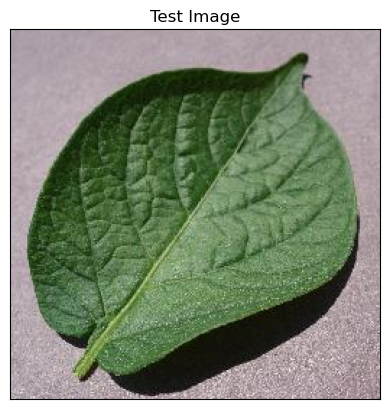

In [200]:
image_path = 'test/PotatoHealthy2.JPG'
imag = cv2.imread(image_path)
imag = cv2.cvtColor(imag, cv2.COLOR_BGR2RGB)

plt.imshow(imag)
plt.title('Test Image')
plt.xticks([]) 
plt.yticks([])
plt.show

In [202]:
import numpy as np
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
input_arr, input_arr.shape

(array([[[[173., 160., 170.],
          [172., 159., 169.],
          [165., 152., 162.],
          ...,
          [174., 161., 170.],
          [179., 166., 175.],
          [177., 164., 173.]],
 
         [[172., 159., 169.],
          [169., 156., 166.],
          [167., 154., 164.],
          ...,
          [173., 160., 169.],
          [177., 164., 173.],
          [178., 165., 174.]],
 
         [[169., 156., 166.],
          [168., 155., 165.],
          [170., 157., 167.],
          ...,
          [176., 163., 172.],
          [175., 162., 171.],
          [178., 165., 174.]],
 
         ...,
 
         [[180., 169., 177.],
          [203., 192., 200.],
          [206., 195., 203.],
          ...,
          [173., 154., 160.],
          [124., 105., 111.],
          [128., 109., 115.]],
 
         [[195., 184., 192.],
          [155., 144., 152.],
          [154., 143., 151.],
          ...,
          [147., 128., 134.],
          [159., 140., 146.],
          [181., 162., 168.

In [204]:
prediction = model2.predict(input_arr)
prediction, prediction.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


(array([[4.6291525e-08, 2.4238884e-07, 5.0409859e-08, 2.5006750e-06,
         1.0350108e-06, 5.9579190e-09, 3.6597653e-06, 8.2567446e-09,
         4.9223523e-08, 2.1475914e-09, 2.1647585e-08, 1.6114111e-08,
         3.7244131e-08, 3.4405843e-09, 5.5648961e-09, 4.2794102e-09,
         1.4505190e-09, 2.9874747e-10, 5.0649338e-09, 2.2016916e-06,
         1.7940130e-06, 5.2876921e-06, 9.9992812e-01, 1.9279096e-06,
         4.3281256e-05, 1.6859306e-09, 3.8234749e-09, 9.1287166e-06,
         1.9733198e-10, 1.9824290e-08, 1.1163628e-07, 3.0033132e-09,
         3.7024709e-08, 3.7342915e-09, 2.5488836e-07, 3.8677531e-10,
         1.4106833e-09, 1.2427196e-07]], dtype=float32),
 (1, 38))

In [206]:
result_ind = np.argmax(prediction)
result_ind

22

<function matplotlib.pyplot.show(close=None, block=None)>

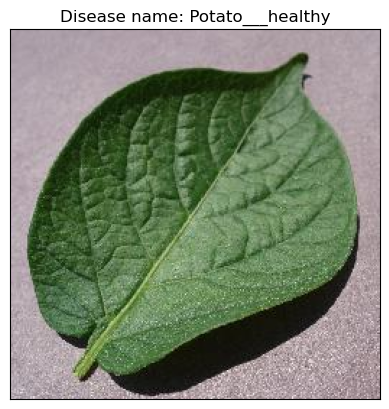

In [208]:
Img_class = data_classes[result_ind]
Img_class
plt.imshow(imag)
plt.title(f'Disease name: {Img_class}')
plt.xticks([])
plt.yticks([])
plt.show